In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [4]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.054656,-2.542635,0.204781,1.651337,2.461440,0
1,1.621916,-1.268126,-0.846829,-1.721178,0.399303,0
2,-0.997389,-1.859219,-4.083161,-0.877436,-2.343356,1
3,-0.094402,1.141922,-2.385826,0.556563,-1.660612,1
4,-0.201078,-3.245736,-2.386535,-3.220544,-2.712976,1


In [5]:
# function for row sampling
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [40]:
# function for feature sampling
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df


In [7]:
# function for combined sampling
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [18]:
df.sample(5)

,col1,col2,col3,col4,col5,target
76,-0.047607,-2.991005,-0.344053,0.121345,0.754454,0
69,1.368496,-0.337208,-6.261573,-2.585040,-0.769366,1
22,1.671768,1.212750,1.378060,-2.016338,-1.604101,1
92,0.891609,0.338964,-0.675603,-0.449675,-1.416664,1
39,1.498859,0.520869,-1.441403,1.390506,0.667262,0


In [9]:
df1 = sample_rows(df,0.1)

In [10]:
df2 = sample_rows(df,0.1)

In [11]:
df3 = sample_rows(df,0.1)

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [19]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df1.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df1.iloc[:,-1])

DecisionTreeClassifier()

In [20]:
from sklearn.tree import plot_tree

[Text(0.6666666666666666, 0.875, 'x[1] <= 0.039\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.5, 0.625, 'x[0] <= 0.177\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.3333333333333333, 0.375, 'x[4] <= 0.52\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

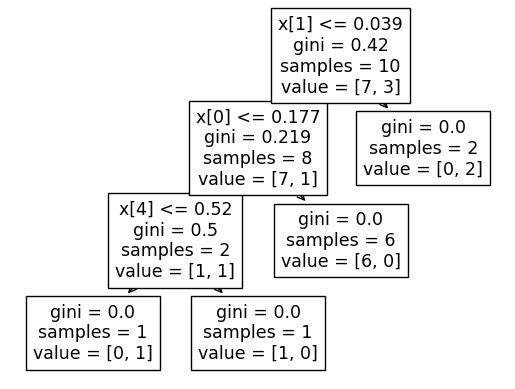

In [21]:
plot_tree(clf1)

[Text(0.6, 0.8333333333333334, 'x[2] <= -2.515\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.4, 0.5, 'x[2] <= -2.775\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

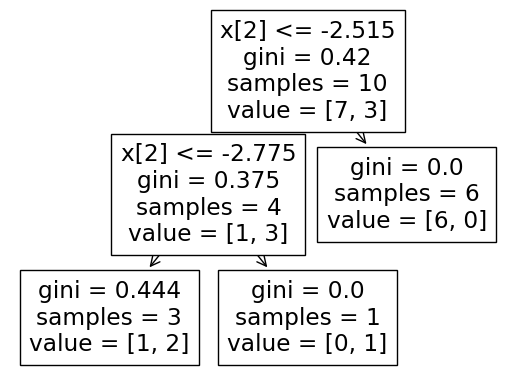

In [22]:
plot_tree(clf2)

[Text(0.4, 0.875, 'x[1] <= -1.075\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.625, 'x[4] <= 0.526\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4, 0.375, 'x[3] <= -0.631\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

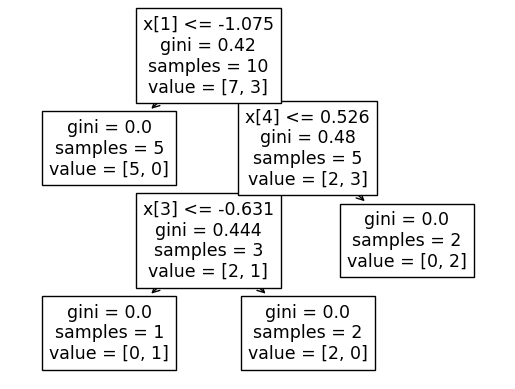

In [23]:
plot_tree(clf3)

In [25]:
clf1.predict(np.array([-0.047607,	-2.991005,	-0.344053,	0.121345,	0.754454]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [26]:
clf2.predict(np.array([-0.047607,	-2.991005,	-0.344053,	0.121345,	0.754454]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [27]:
clf3.predict(np.array([-0.047607,	-2.991005,	-0.344053,	0.121345,	0.754454]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [58]:
df4 = sample_features(df,0.8)

<ipython-input-40-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [59]:
df5 = sample_features(df,0.8)

<ipython-input-40-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [60]:
df6 = sample_features(df,0.8)

<ipython-input-40-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [61]:
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier()

In [63]:
clf4.fit(df4.iloc[:,0:4],df4.iloc[:,-1])
clf5.fit(df5.iloc[:,0:4],df5.iloc[:,-1])
clf6.fit(df6.iloc[:,0:4],df6.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5526315789473685, 0.95, 'x[2] <= -0.057\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3157894736842105, 0.85, 'x[0] <= 0.867\ngini = 0.282\nsamples = 53\nvalue = [9, 44]'),
 Text(0.21052631578947367, 0.75, 'x[2] <= -1.277\ngini = 0.215\nsamples = 49\nvalue = [6, 43]'),
 Text(0.15789473684210525, 0.65, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.2631578947368421, 0.65, 'x[3] <= 0.876\ngini = 0.365\nsamples = 25\nvalue = [6, 19]'),
 Text(0.21052631578947367, 0.55, 'x[1] <= -1.346\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.10526315789473684, 0.45, 'x[2] <= -0.541\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.05263157894736842, 0.35, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.15789473684210525, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3157894736842105, 0.45, 'x[3] <= 0.573\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.2631578947368421, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3684210526315789

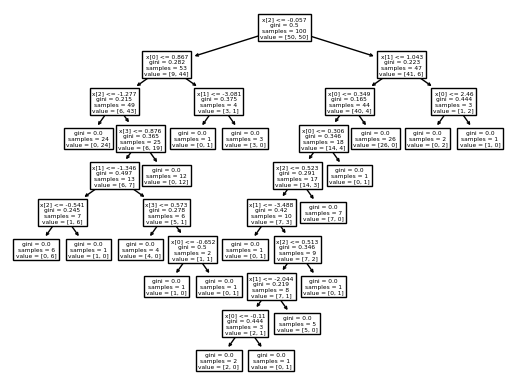

In [64]:
plot_tree(clf4)

[Text(0.5526315789473685, 0.95, 'x[3] <= -0.057\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3157894736842105, 0.85, 'x[2] <= 0.867\ngini = 0.282\nsamples = 53\nvalue = [9, 44]'),
 Text(0.21052631578947367, 0.75, 'x[3] <= -1.277\ngini = 0.215\nsamples = 49\nvalue = [6, 43]'),
 Text(0.15789473684210525, 0.65, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.2631578947368421, 0.65, 'x[1] <= 0.876\ngini = 0.365\nsamples = 25\nvalue = [6, 19]'),
 Text(0.21052631578947367, 0.55, 'x[0] <= -1.346\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.10526315789473684, 0.45, 'x[3] <= -0.541\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.05263157894736842, 0.35, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.15789473684210525, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3157894736842105, 0.45, 'x[1] <= 0.573\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.2631578947368421, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3684210526315789

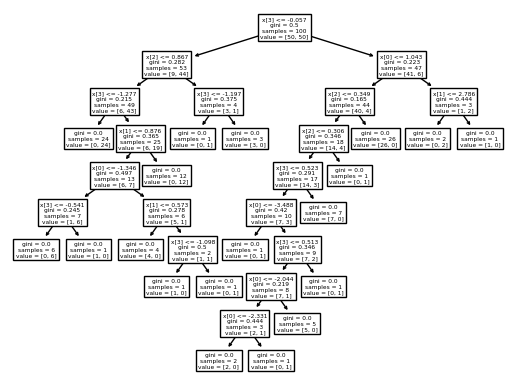

In [65]:
plot_tree(clf5)

[Text(0.5476190476190477, 0.95, 'x[2] <= -0.057\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2857142857142857, 0.85, 'x[0] <= 0.867\ngini = 0.282\nsamples = 53\nvalue = [9, 44]'),
 Text(0.19047619047619047, 0.75, 'x[2] <= -1.277\ngini = 0.215\nsamples = 49\nvalue = [6, 43]'),
 Text(0.14285714285714285, 0.65, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.23809523809523808, 0.65, 'x[1] <= 0.876\ngini = 0.365\nsamples = 25\nvalue = [6, 19]'),
 Text(0.19047619047619047, 0.55, 'x[3] <= -1.346\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.09523809523809523, 0.45, 'x[2] <= -0.541\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.047619047619047616, 0.35, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.14285714285714285, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2857142857142857, 0.45, 'x[1] <= 0.573\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.23809523809523808, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3333333333333

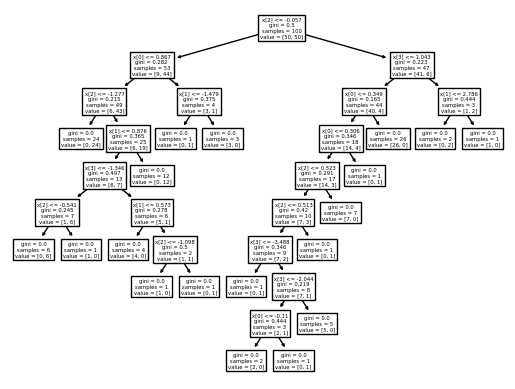

In [66]:
plot_tree(clf6)

In [67]:
sample_features(df,0.8)

<ipython-input-40-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col3,col5,col2,col1,target
0,0.204781,2.461440,-2.542635,0.054656,0
1,-0.846829,0.399303,-1.268126,1.621916,0
2,-4.083161,-2.343356,-1.859219,-0.997389,1
3,-2.385826,-1.660612,1.141922,-0.094402,1
4,-2.386535,-2.712976,-3.245736,-0.201078,1
...,...,...,...,...,...
95,-1.905323,1.193783,-0.150295,1.171572,0
96,-2.252652,-1.117017,-4.078248,0.076169,1
97,-1.277227,0.419459,-0.655145,2.723882,0
98,-1.906092,0.156674,-0.609488,2.121652,0


In [68]:
clf4.predict(np.array([-2.252652,	-1.117017,	-4.078248,	0.076169	]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [69]:
clf5.predict(np.array([-2.252652,	-1.117017,	-4.078248,	0.076169	]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [70]:
clf6.predict(np.array([-2.252652,	-1.117017,	-4.078248,	0.076169	]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [72]:
combined_sampling(df,0.5,0.5).shape

<ipython-input-40-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


(50, 3)

In [73]:
df7 = combined_sampling(df,0.5,0.5)
df8 = combined_sampling(df,0.5,0.5)
df9 = combined_sampling(df,0.5,0.5)

<ipython-input-40-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-40-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-40-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [74]:
print(df7.columns)
print(df8.columns)
print(df9.columns)

Index(['col2', 'col5', 'target'], dtype='object')
Index(['col5', 'col3', 'target'], dtype='object')
Index(['col3', 'col5', 'target'], dtype='object')


In [75]:
clf7 = DecisionTreeClassifier()
clf8 = DecisionTreeClassifier()
clf9 = DecisionTreeClassifier()

In [76]:
clf7.fit(df7.iloc[:,0:2],df7.iloc[:,-1])
clf8.fit(df8.iloc[:,0:2],df8.iloc[:,-1])
clf9.fit(df9.iloc[:,0:2],df9.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.4, 0.9285714285714286, 'x[1] <= 0.471\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.3, 0.7857142857142857, 'x[1] <= -1.299\ngini = 0.437\nsamples = 31\nvalue = [10, 21]'),
 Text(0.2, 0.6428571428571429, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.4, 0.6428571428571429, 'x[1] <= -0.803\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.2, 0.5, 'x[0] <= -1.189\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.35714285714285715, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.5, 'x[0] <= -2.396\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.5, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.35714285714285715, 'x[1] <= 0.011\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.6, 0.21428571428571427, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8, 0.21428571428571427, 'x[1] <= 0.356\ngini = 0.5\nsamples = 4\nvalue = [2

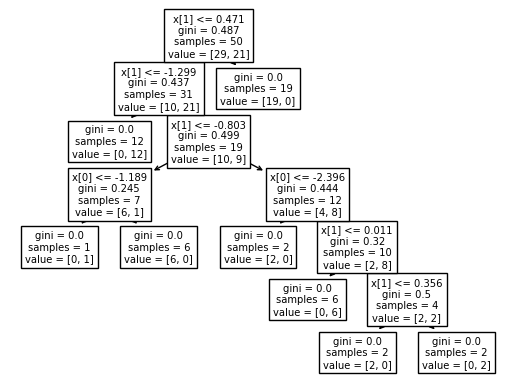

In [77]:
plot_tree(clf7)

[Text(0.36363636363636365, 0.95, 'x[0] <= 0.552\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.2727272727272727, 0.85, 'x[0] <= -1.277\ngini = 0.432\nsamples = 38\nvalue = [12, 26]'),
 Text(0.18181818181818182, 0.75, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.36363636363636365, 0.75, 'x[1] <= -2.86\ngini = 0.49\nsamples = 28\nvalue = [12, 16]'),
 Text(0.2727272727272727, 0.65, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.45454545454545453, 0.65, 'x[1] <= -1.094\ngini = 0.5\nsamples = 24\nvalue = [12, 12]'),
 Text(0.2727272727272727, 0.55, 'x[0] <= 0.036\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.18181818181818182, 0.45, 'x[0] <= -1.147\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.09090909090909091, 0.35, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.2727272727272727, 0.35, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.36363636363636365, 0.45, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6363636363636364, 0.55, 'x[0] <= 0

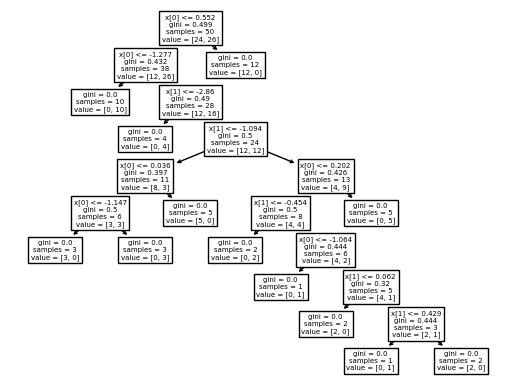

In [78]:
plot_tree(clf8)

[Text(0.5384615384615384, 0.9375, 'x[1] <= 0.017\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.23076923076923078, 0.8125, 'x[1] <= -1.389\ngini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(0.15384615384615385, 0.6875, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.3076923076923077, 0.6875, 'x[1] <= -1.228\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.23076923076923078, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.38461538461538464, 0.5625, 'x[1] <= -0.808\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.3076923076923077, 0.4375, 'x[1] <= -0.886\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.23076923076923078, 0.3125, 'x[0] <= -2.624\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.15384615384615385, 0.1875, 'x[0] <= -3.303\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07692307692307693, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23076923076923078, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),


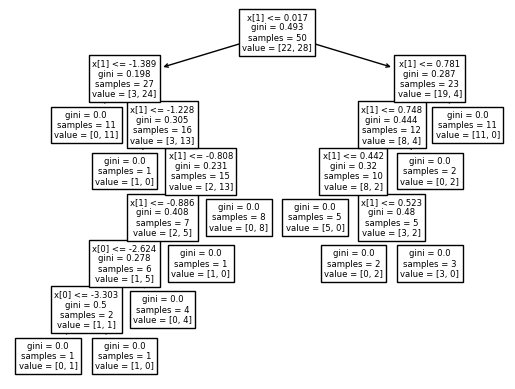

In [79]:
plot_tree(clf9)